In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

In [2]:
cd ~/Desktop

C:\Users\agilman\Desktop


In [3]:
data = pd.read_csv("bioreactor_data_test.txt", delimiter = "\t")

In [4]:
#Convert lists into dict for units and iteration 
list1_3itms = ['VCD', 'Viability', 'Titer']
list2_4itms = ['O2 Saturation', 'PCO2', 'Gluc', 'Lac',]
list3_4itms = ['pH','NH4+','Gln', 'Glu',]
list4_3itms = ['Na+', 'K+', 'Ca++']

dict1_3itms = {'VCD':"10E6 Cells/mL", 'Viability':"%", 'Titer':"g/L"}
dict2_4itms = {'O2 Saturation':"% Air Saturation", 'PCO2':"mmHg", 'Gluc':"mol/L", 'Lac':"mol/L",}
dict3_4itms = {'pH':"pH",'NH4+':"mol/L",'Gln':"mol/L", 'Glu':"mol/L",}
dict4_3itms = {'Na+':"mol/L", 'K+':"mol/L", 'Ca++':"mol/L"}

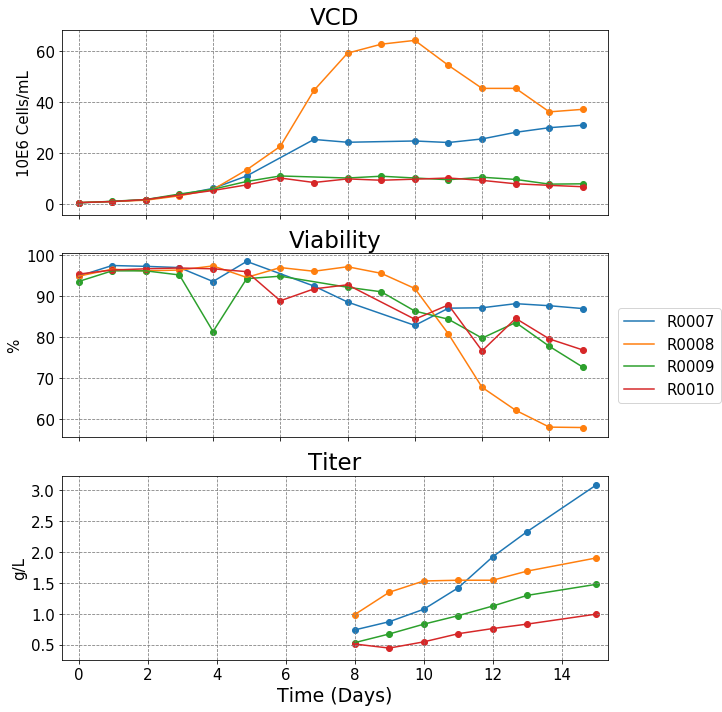

In [10]:
fig = plt.figure(figsize = (10,10))
num=1
for i, value in dict1_3itms.items(): 
    #creating a column of 3 subplots
    ax = fig.add_subplot(3,1,num)
    num +=1
    
    #iterating over grouped reactor ID
    for key, grp in data.groupby(['Sample ID']): 
        ax.scatter(grp['Runtime'], grp[i], label='_nolegend_') #Point plots
        mask = np.isfinite(grp[i])
        ax.plot(grp['Runtime'][mask], grp[i][mask], label=key) #line plots
        
        
        ax.set_xlim(left = -0.5) #forcing a zero lower x limit (titer)
        ax.tick_params(axis='both', which='major', labelsize=15) #tick labels size
        ax.set_xlabel("Time (Days)", fontsize = 19) #x-axis label
        ax.set_ylabel(value , fontsize = 15) #y-axis label
        
        
        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')
        ax.label_outer()
        
        ax.set_title(i, fontsize = 23)

        
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', borderaxespad=0.1, fontsize = 15)
fig.tight_layout()
fig.subplots_adjust(right=0.85) 

plt.savefig("Figure1_vitals.png", dpi = 500)

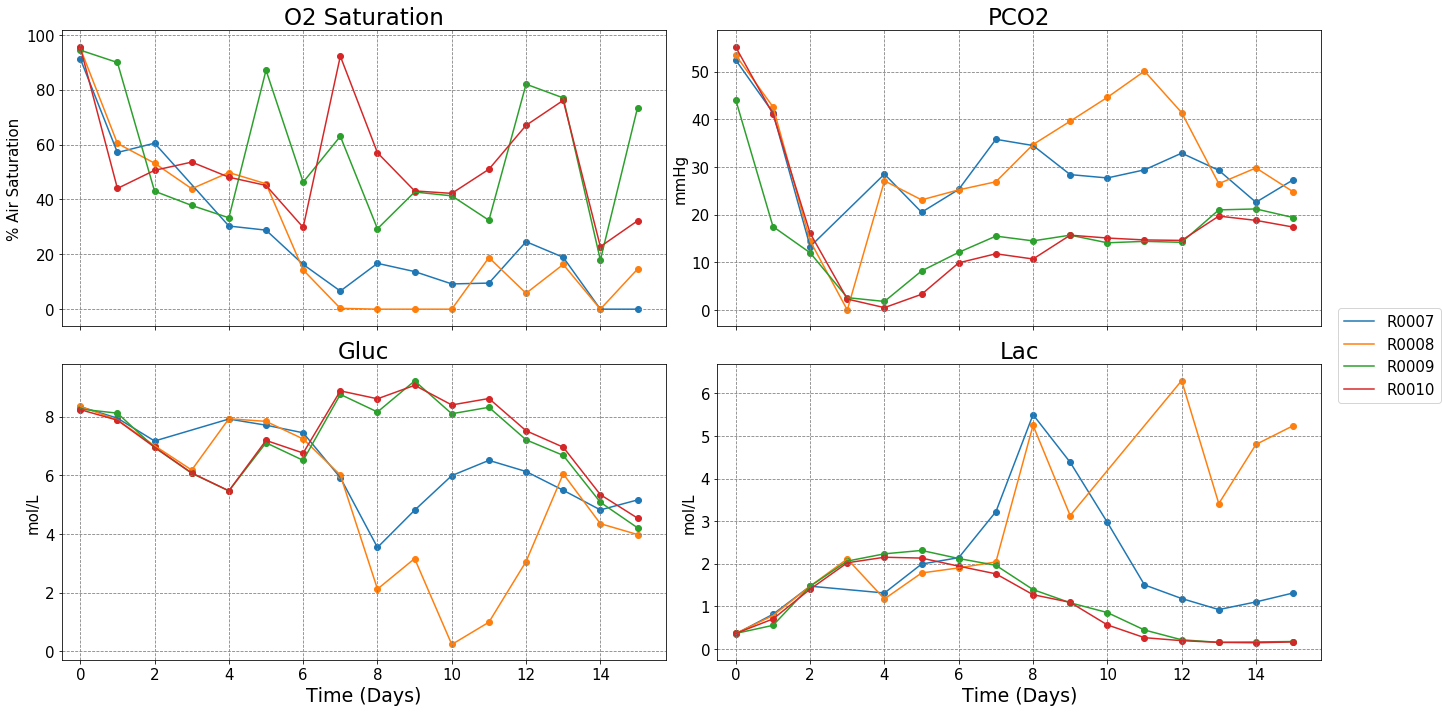

In [6]:
the_list = list2_4itms
the_dict = dict2_4itms

fig, axes = plt.subplots(nrows=2, ncols =2 , sharex=True, figsize = (20,10))

#axes[0].plot([1,2,3,4],[10,20,30,40])

#for i, value in dict2_4itms.items():
#print (fig.axes()[0])

for i, ax in enumerate(fig.axes):
    
        for key, grp in data.groupby(['Sample ID']): 
            clm = the_list[i]   #column name from list, called by enumerated for loop
            
            ax.scatter(grp['Runtime'], grp[clm], label='_nolegend_') #Point plots
            mask = np.isfinite(grp[clm]) #masking over NaN data (lines dont connect)
            ax.plot(grp['Runtime'][mask], grp[clm][mask], label=key) #line plots
            
            
            
            ax.set_xlim(left = -0.5) #forcing a zero lower x limit (titer)
            ax.tick_params(axis='both', which='major', labelsize=15) #tick labels size
            #ax.set_xlabel("Time (Days)", fontsize = 19) #x-axis label
            ax.set_ylabel(the_dict[clm] , fontsize = 15) #y-axis label

            ax.yaxis.grid(color='gray', linestyle='dashed')
            ax.xaxis.grid(color='gray', linestyle='dashed')

            #ax.label_outer() #will do for both axes 

            ax.set_title(clm, fontsize = 23)
            
axes[1,0].set_xlabel("Time (Days)", fontsize = 19) #x-axis label manually adding to outer 
axes[1,1].set_xlabel("Time (Days)", fontsize = 19) #x-axis label

            
handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc='center right', borderaxespad=0.1, fontsize = 15)
fig.tight_layout()
fig.subplots_adjust(right=0.92) 
        

plt.savefig("Figure2_gases.png", dpi = 500)

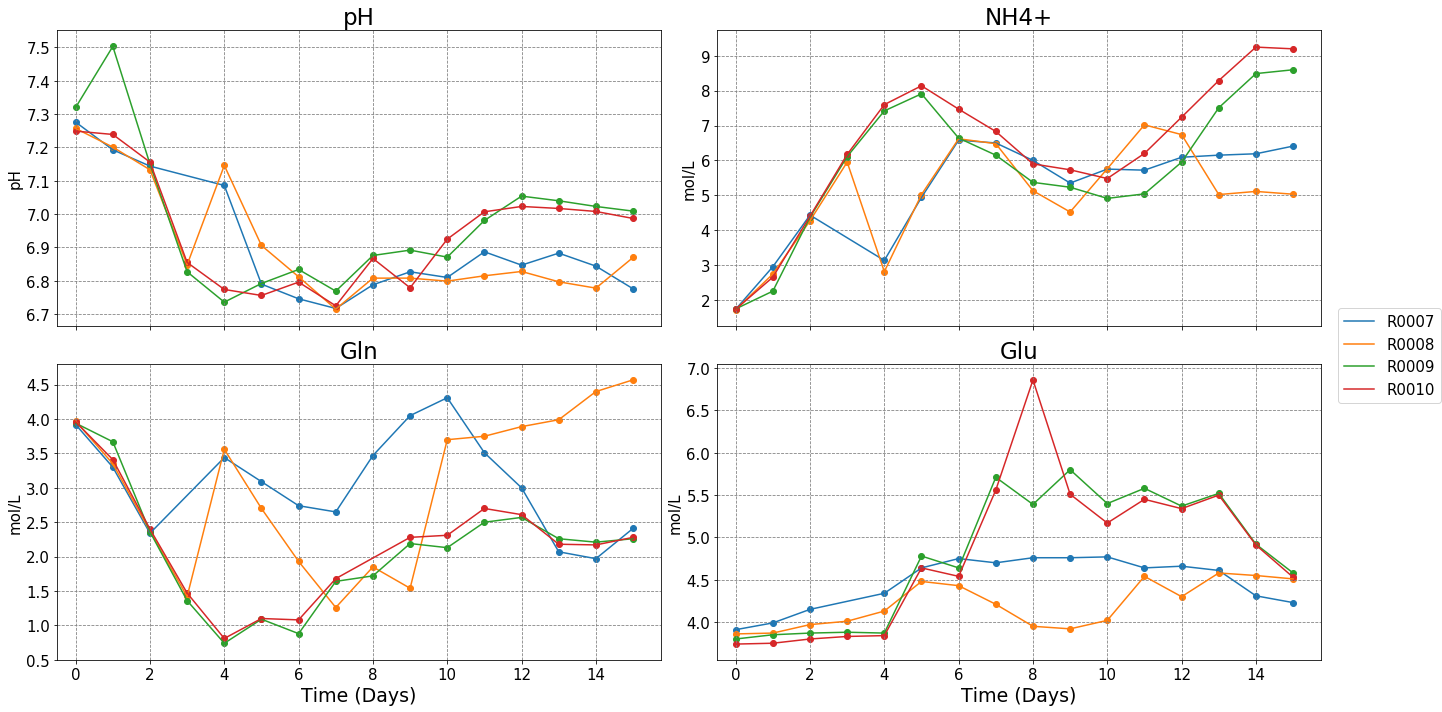

In [8]:
the_list = list3_4itms
the_dict = dict3_4itms

fig, axes = plt.subplots(nrows=2, ncols =2 , sharex=True, figsize = (20,10))

#axes[0].plot([1,2,3,4],[10,20,30,40])

#for i, value in dict2_4itms.items():
#print (fig.axes()[0])

for i, ax in enumerate(fig.axes):
    
        for key, grp in data.groupby(['Sample ID']): 
            clm = the_list[i]   #column name from list, called by enumerated for loop
            
            ax.scatter(grp['Runtime'], grp[clm], label='_nolegend_') #Point plots
            mask = np.isfinite(grp[clm]) #masking over NaN data (lines dont connect)
            ax.plot(grp['Runtime'][mask], grp[clm][mask], label=key) #line plots
            
            
            
            ax.set_xlim(left = -0.5) #forcing a zero lower x limit (titer)
            ax.tick_params(axis='both', which='major', labelsize=15) #tick labels size
            #ax.set_xlabel("Time (Days)", fontsize = 19) #x-axis label
            ax.set_ylabel(the_dict[clm] , fontsize = 15) #y-axis label

            ax.yaxis.grid(color='gray', linestyle='dashed')
            ax.xaxis.grid(color='gray', linestyle='dashed')

            #ax.label_outer() #will do for both axes 

            ax.set_title(clm, fontsize = 23)
            
axes[1,0].set_xlabel("Time (Days)", fontsize = 19) #x-axis label manually adding to outer 
axes[1,1].set_xlabel("Time (Days)", fontsize = 19) #x-axis label

            
handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc='center right', borderaxespad=0.1, fontsize = 15)
fig.tight_layout()
fig.subplots_adjust(right=0.92) 
        

plt.savefig("Figure3_chemistry.png", dpi = 500)


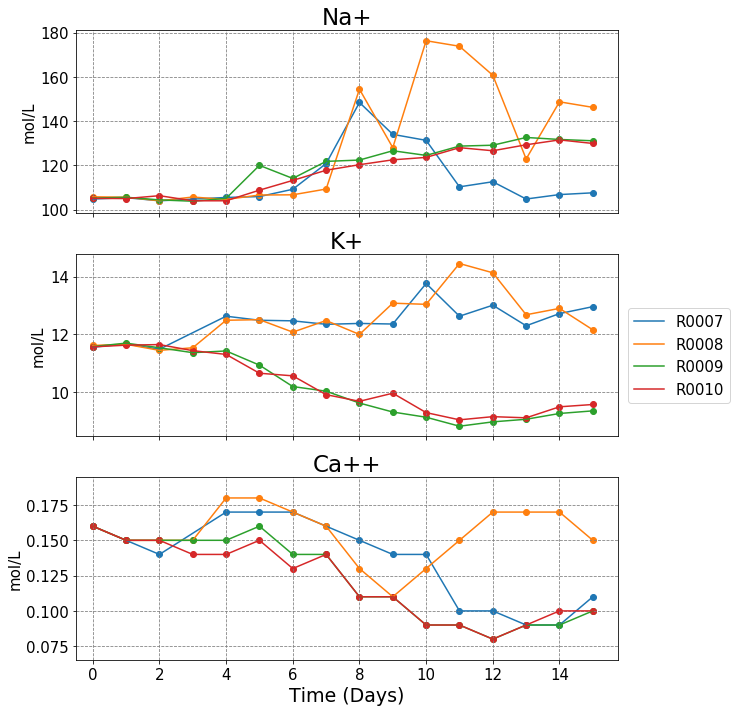

In [9]:
fig = plt.figure(figsize = (10,10))
num=1
for i, value in dict4_3itms.items(): 
    #creating a column of 3 subplots
    ax = fig.add_subplot(3,1,num)
    num +=1
    
    #iterating over grouped reactor ID
    for key, grp in data.groupby(['Sample ID']): 
        ax.scatter(grp['Runtime'], grp[i], label='_nolegend_') #Point plots
        mask = np.isfinite(grp[i])
        ax.plot(grp['Runtime'][mask], grp[i][mask], label=key) #line plots
        
        
        ax.set_xlim(left = -0.5) #forcing a zero lower x limit (titer)
        ax.tick_params(axis='both', which='major', labelsize=15) #tick labels size
        ax.set_xlabel("Time (Days)", fontsize = 19) #x-axis label
        ax.set_ylabel(value , fontsize = 15) #y-axis label
        
        
        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')
        ax.label_outer()
        
        ax.set_title(i, fontsize = 23)

        
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', borderaxespad=0.1, fontsize = 15)
fig.tight_layout()
fig.subplots_adjust(right=0.85) 

plt.savefig("Figure4_metals.png", dpi = 500)

# Appendix - everything below is chronological development progress 

In [ ]:
#Learning how to the groupby object works, its essentially a dict of dataframes that are grouped by the dict keyword
#Very powerful! Can iterate over grouped items for nice plot overlays

fig, ax = plt.subplots(figsize=(10,4))
for key, grp in data.groupby(['Sample ID']):
    ax.plot(grp['Runtime'], grp['Titer'], label=key)
    ax.set_title("Osm")
ax.legend()
plt.show()

In [ ]:
#can iterate the overlays over every column in a list


for i in columns_list:
    
    fig, ax = plt.subplots(figsize=(10,4))
    for key, grp in data.groupby(['Sample ID']):
        ax.scatter(grp['Runtime'], grp[i], label='_nolegend_') #Point plots
        mask = np.isfinite(grp[i])
        ax.plot(grp['Runtime'][mask], grp[i][mask], label=key) #line plots
        ax.set_title(i)
    ax.legend()


In [ ]:
# Can isolate several lists to create custom 3 pain plot or 4 pain per list of columns of data 


fig = plt.figure(figsize = (10,10))
num=1
for i in list1_3itms: 
    #creating a column of 3 subplots
    ax = fig.add_subplot(3,1,num)
    num +=1
    
    #iterating over grouped reactor ID
    for key, grp in data.groupby(['Sample ID']): 
        ax.scatter(grp['Runtime'], grp[i], label='_nolegend_') #Point plots
        mask = np.isfinite(grp[i])
        ax.plot(grp['Runtime'][mask], grp[i][mask], label=key) #line plots
        ax.set_xlim(xmin = -0.5) #forcing a zero lower x limit (titer)
        
        ax.set_title(i)
    
    
fig.legend(loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.75) 

In [ ]:
# Learning how to iterate over dict with key as column ID and value as y axis data 


fig = plt.figure(figsize = (10,10))
num=1
for i, value in dict1_3itms.items(): 
    #creating a column of 3 subplots
    ax = fig.add_subplot(3,1,num)
    num +=1
    
    #iterating over grouped reactor ID
    for key, grp in data.groupby(['Sample ID']): 
        ax.scatter(grp['Runtime'], grp[i], label='_nolegend_') #Point plots
        mask = np.isfinite(grp[i])
        ax.plot(grp['Runtime'][mask], grp[i][mask], label=key) #line plots
        ax.set_xlim(left = -0.5) #forcing a zero lower x limit (titer)
        
        ax.set_title(i)
        
        ax.set_ylabel(value , fontsize = 20) #x-axis label
    
    
fig.legend(loc=7)
fig.tight_layout()
fig.subplots_adjust(right=0.75) 

In [ ]:
#attempting to transfer to 4 pane, easy to do with all the axis labels in place, harder to do with only outer.

fig = plt.figure(figsize = (20,10))
num=1
for i, value in dict2_4itms.items(): 
    #creating a column of 3 subplots
    ax = fig.add_subplot(2,2,num,)
    num +=1
    
    #iterating over grouped reactor ID
    for key, grp in data.groupby(['Sample ID']): 
        ax.scatter(grp['Runtime'], grp[i], label='_nolegend_') #Point plots
        mask = np.isfinite(grp[i])
        ax.plot(grp['Runtime'][mask], grp[i][mask], label=key) #line plots
        
        
        ax.set_xlim(left = -0.5) #forcing a zero lower x limit (titer)
        ax.tick_params(axis='both', which='major', labelsize=15) #tick labels size
        ax.set_xlabel("Time (Days)", fontsize = 19) #x-axis label
        ax.set_ylabel(value , fontsize = 15) #y-axis label
        
        
        ax.yaxis.grid(color='gray', linestyle='dashed')
        ax.xaxis.grid(color='gray', linestyle='dashed')
        
        #ax.label_outer(yaxis = False)
        
        ax.set_title(i, fontsize = 23)

        
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', borderaxespad=0.1, fontsize = 15)
fig.tight_layout()
fig.subplots_adjust(right=0.92)

#plt.savefig("Figure1_vitals.png", dpi = 500)